<a href="https://colab.research.google.com/github/dsliwka/EEMP2024/blob/main/Notebooks/SalesSimDiDSampleSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
!pip install pyfixest -q
import seaborn as sns
import pyfixest as pf

**Generating Simulated Panel Data**

----

In [10]:
n=500
df1=pd.DataFrame(index=range(n))
df1['ability']=np.random.normal(100,15,n)
df1['year']=1

## This is a numer identifying each person in the data set
df1['persnr']=df1.index

## Determine who will be (later) trained
df1['tgroup']=(df1.ability+np.random.normal(0,10,n)>=100)*1

## Copy the DataFrame to create second year observations stored in df2
df2=df1.copy()
df2['year']=2

## Training only in the training group and only in year 2:
df1['training']=0
df2['training']=df2.tgroup

## Generate DataFrame that spans both years combining the two:
## Note for each person we have two rows, one for each year
df=pd.concat([df1,df2], sort=False)

## Generate sales as before
## but add a year effect: sales increase by 4000 Euro between years 1 and 2:
df['sales']= 10000 + df.training*5000 + df.ability*100 + df.year*4000    + np.random.normal(0,4000,2*n)


**Looking at the Diff-in-Diff**

----

<Axes: xlabel='year', ylabel='sales'>

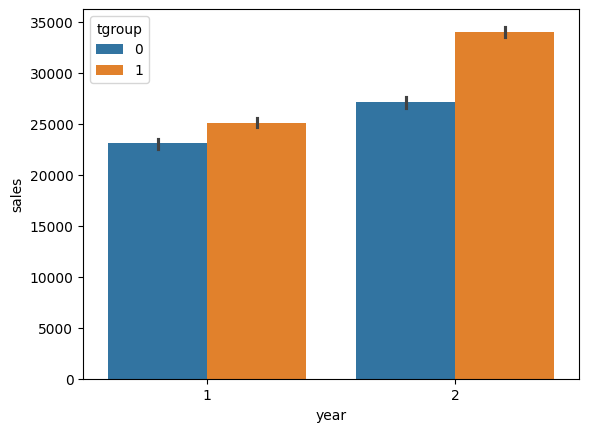

In [4]:
sns.barplot(x='year', y='sales', hue='tgroup', data=df)

In [6]:
df.groupby(['tgroup','year']).sales.mean()

tgroup  year
0       1       23053.300339
        2       27106.166406
1       1       25095.931077
        2       33986.837108
Name: sales, dtype: float64

**Note:**

You can compute the diff-in-diff manually from this table or compute the means in the subgroups as follows (there are many alternative ways to do this in Python).

In [11]:
r=df.groupby(['year','tgroup']).sales.mean()

r.loc[2,1]-r.loc[2,0]-(r.loc[1,1]-r.loc[1,0])

4510.174381923585

**Regression Diff-in-Diff**

----

In [14]:
df["post"]=(df.year==2)*1

did=pf.feols("sales ~ tgroup * post", data=df)
did2=pf.feols("sales ~ tgroup + post + training", data=df)

pf.etable( [did, did2], scientific_notation=False, signif_code=[0.01,0.05,0.1])

GT(_tbl_data=  level_0        level_1                            0  \
0    coef         tgroup   2338.302*** <br> (369.172)   
1    coef           post   4163.255*** <br> (373.576)   
2    coef    tgroup:post   4510.174*** <br> (522.088)   
3    coef       training                                
4    coef      Intercept  23161.496*** <br> (264.158)   
5   stats   Observations                         1000   
6   stats      S.E. type                          iid   
7   stats  R<sup>2</sup>                        0.501   

                             1  
0   2338.302*** <br> (369.172)  
1   4163.255*** <br> (373.576)  
2                               
3   4510.174*** <br> (522.088)  
4  23161.496*** <br> (264.158)  
5                         1000  
6                          iid  
7                        0.501  , _body=<great_tables._gt_data.Body object at 0x7bba7fd4c1c0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7bba84117490>, _spanners=Spanners([SpannerInfo(spanner_id='sales', spanner_level=1, spanner_label='sales', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7bba84117550>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), tab

**Interpretation**

Here we estimate the Diff-in-Diff trough a regression where troup estimates the difference in levels in year 1, post estimates the time trend (the increase in sales in the "control group" where tgroup=0) and the interaction term estimates the difference in the change over time between the "treatment group" and the "control group". (The purpose of column (2) is just to show you that the training dummy is identical to the interaction term tgroup:post).

We thus get the same estimate for the causal effect as in our "manual" analysis above, but conveniently, we here also get an estimate of the standard error.

**Estimating a Fixed Effects Model**

----

We can easily estimate a fixed effects model with pyfixest. Just add the variables for which you want fixed effects to be estimated after a "|" in the regression formula. As there are only two periods, you can also directly control for the time trend by adding the post dummy as a control variable.

In [25]:
fe1=pf.feols("sales ~ training | persnr + post", data=df, vcov={"CRV1": "persnr"})
fe2=pf.feols("sales ~ training + post | persnr", data=df, vcov={"CRV1": "persnr"})

pf.etable([did2,fe1,fe2], scientific_notation=False, model_heads=["DiD", "FE", "FE"])

GT(_tbl_data=  level_0        level_1                            0  \
0    coef       training   4510.174*** <br> (522.088)   
1    coef         tgroup   2338.302*** <br> (369.172)   
2    coef           post   4163.255*** <br> (373.576)   
3    coef      Intercept  23161.496*** <br> (264.158)   
4      fe         persnr                            -   
5      fe           post                            -   
6   stats   Observations                         1000   
7   stats      S.E. type                          iid   
8   stats  R<sup>2</sup>                        0.501   

                            1                           2  
0  4510.174*** <br> (512.384)  4510.174*** <br> (512.640)  
1                                                          
2                              4163.255*** <br> (349.045)  
3                                                          
4                           x                           x  
5                           x                           -  
6                        1000                        1000  
7                  by: persnr                  by: persnr  
8                       0.758                       0.758  , _body=<great_tables._gt_data.Body object at 0x7bba7dff2110>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7bba7dff3130>, _spanners=Spanners([SpannerInfo(spanner_id='sales', spanner_level=2, spanner_label='sales', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None), SpannerInfo(spanner_id='DiD', spanner_level=1, spanner_label='DiD', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='FE', spanner_level=1, spanner_label='FE', spanner_units=None, spanner_pattern=None, vars=['1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7bba7dff1de0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), tab

Note that the DiD and the FE model here lead to exactly the same estimate for the coefficient. The fixed effects estimate comes with (slightly) smaller standard errors.